# Logistic Regression

In this notebook, we will try the model [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [1]:
import pickle
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

We load our data

In [7]:
path='/home/maggie/News_classifier/4. Features Creation/' 

# data
with open(path + 'data_modified.pickle', 'rb') as file:
    data=pickle.load(file)

# features_train
with open(path + 'features_train.pickle', 'rb') as file:
    features_train=pickle.load(file)

# features_test
with open(path + 'features_test.pickle', 'rb') as file:
    features_test=pickle.load(file)
    
# y_train
with open(path + 'y_train.pickle', 'rb') as file:
    y_train=pickle.load(file)
    
# y_test
with open(path + 'y_test.pickle', 'rb') as file:
    y_test=pickle.load(file)

In [8]:
print(features_train.shape)
print(features_test.shape)

(16728, 8257)
(7170, 8257)


## Hyperparameter tuning

In [9]:
lr0 =LogisticRegression()

print('Parameters:\n')
pprint(lr0.get_params())

Parameters:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


We will tune the following parameters:

- **C**=Inverse of regularization strength. Smaller values specify stronger regularization.  
- **solver**= Algorithm to use in the optimization problem.


### Grid Search Cross Validation

In [10]:
# Create the parameter grid 
#C 
C=[0.01,0.1,1.0,10]
#solver
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter=[1000]

param_grid = {
'C': C,
'solver':solver,
'max_iter':max_iter}

# Base model
lr = LogisticRegression()

# Grid search model
grid_search = GridSearchCV(estimator=lr, 
                            param_grid=param_grid,
                            scoring='accuracy',
                            verbose=12)

# Fit the grid search to the data
grid_search.fit(features_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=0.01, max_iter=1000, solver=newton-cg....................
[CV 1/5; 1/20] END C=0.01, max_iter=1000, solver=newton-cg;, score=0.541 total time=   0.4s
[CV 2/5; 1/20] START C=0.01, max_iter=1000, solver=newton-cg....................
[CV 2/5; 1/20] END C=0.01, max_iter=1000, solver=newton-cg;, score=0.545 total time=   0.4s
[CV 3/5; 1/20] START C=0.01, max_iter=1000, solver=newton-cg....................
[CV 3/5; 1/20] END C=0.01, max_iter=1000, solver=newton-cg;, score=0.543 total time=   0.4s
[CV 4/5; 1/20] START C=0.01, max_iter=1000, solver=newton-cg....................
[CV 4/5; 1/20] END C=0.01, max_iter=1000, solver=newton-cg;, score=0.546 total time=   0.4s
[CV 5/5; 1/20] START C=0.01, max_iter=1000, solver=newton-cg....................
[CV 5/5; 1/20] END C=0.01, max_iter=1000, solver=newton-cg;, score=0.546 total time=   0.4s
[CV 1/5; 2/20] START C=0.01, max_iter=1000, solver=lbfgs.................

[CV 4/5; 10/20] END C=0.1, max_iter=1000, solver=saga;, score=0.809 total time=   0.4s
[CV 5/5; 10/20] START C=0.1, max_iter=1000, solver=saga.........................
[CV 5/5; 10/20] END C=0.1, max_iter=1000, solver=saga;, score=0.813 total time=   0.6s
[CV 1/5; 11/20] START C=1.0, max_iter=1000, solver=newton-cg....................
[CV 1/5; 11/20] END C=1.0, max_iter=1000, solver=newton-cg;, score=0.859 total time=   1.1s
[CV 2/5; 11/20] START C=1.0, max_iter=1000, solver=newton-cg....................
[CV 2/5; 11/20] END C=1.0, max_iter=1000, solver=newton-cg;, score=0.854 total time=   1.0s
[CV 3/5; 11/20] START C=1.0, max_iter=1000, solver=newton-cg....................
[CV 3/5; 11/20] END C=1.0, max_iter=1000, solver=newton-cg;, score=0.863 total time=   1.1s
[CV 4/5; 11/20] START C=1.0, max_iter=1000, solver=newton-cg....................
[CV 4/5; 11/20] END C=1.0, max_iter=1000, solver=newton-cg;, score=0.852 total time=   1.1s
[CV 5/5; 11/20] START C=1.0, max_iter=1000, solver=ne

[CV 3/5; 20/20] END C=10, max_iter=1000, solver=saga;, score=0.857 total time=   1.4s
[CV 4/5; 20/20] START C=10, max_iter=1000, solver=saga..........................
[CV 4/5; 20/20] END C=10, max_iter=1000, solver=saga;, score=0.847 total time=   1.4s
[CV 5/5; 20/20] START C=10, max_iter=1000, solver=saga..........................
[CV 5/5; 20/20] END C=10, max_iter=1000, solver=saga;, score=0.845 total time=   1.5s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10], 'max_iter': [1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=12)

In [11]:
print("The best hyperparameters from GridSearchCV are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a LogisticRegression model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from GridSearchCV are:
{'C': 1.0, 'max_iter': 1000, 'solver': 'lbfgs'}

The mean accuracy of a LogisticRegression model with these hyperparameters is:
0.8562884179132748


We save the model with the best hyperparameters

In [12]:
best_lr= grid_search.best_estimator_

## Model fit

We fit the model to the training data.

In [13]:
best_lr.fit(features_train, y_train)

LogisticRegression(max_iter=1000)

## Model performance

### - Training accuracy

In [14]:
print("The training accuracy  is: ")
accuracy_train=accuracy_score(y_train,best_lr.predict(features_train))
print(accuracy_train)

The training accuracy  is: 
0.9259325681492109


### - Test accuracy

In [15]:
print("The test accuracy is: ")
lr_pred=best_lr.predict(features_test)
accuracy_test=accuracy_score(y_test, lr_pred)
print(accuracy_test)

The test accuracy is: 
0.8574616457461646


### - Classification report and confusion matrix

Classification report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       904
           1       0.97      0.94      0.95      1448
           2       0.84      0.85      0.85      1276
           3       0.84      0.83      0.83      1073
           4       0.83      0.82      0.82      1392
           5       0.75      0.80      0.78      1077

    accuracy                           0.86      7170
   macro avg       0.86      0.86      0.86      7170
weighted avg       0.86      0.86      0.86      7170



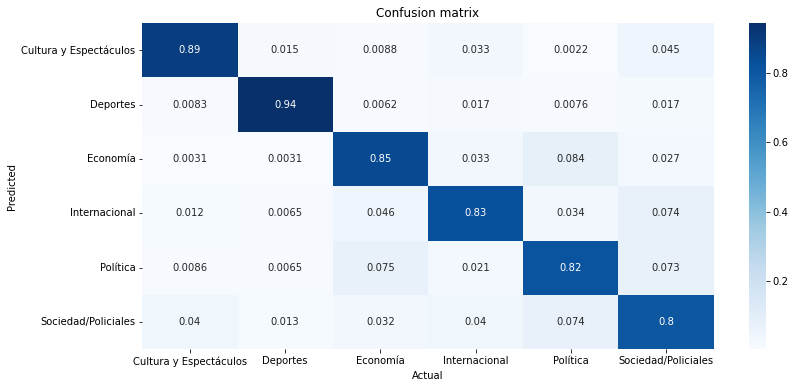

In [16]:
#Classification report
print("Classification report")
print(classification_report(y_test,lr_pred))

#Confusion matrix
aux_data = data[['Label', 'Label_code']].drop_duplicates().sort_values('Label_code')
conf_matrix = confusion_matrix(y_test, lr_pred,normalize='true')
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, annot=True,
            xticklabels=aux_data['Label'], 
            yticklabels=aux_data['Label'],
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

We save our model.

In [17]:
with open('best_lr.pickle', 'wb') as output:
    pickle.dump(best_lr, output)

We also save the scores for the different metrics we considered. In the case of precision, recall and F1-score we use macro average (averaging the unweighted mean per label).

In [18]:
classification_report_macro=classification_report(y_test,lr_pred,output_dict=True)['macro avg']
scores_lr = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_train,
     'Test Set Accuracy': accuracy_test,
     'Precision':classification_report_macro['precision'],
    'Recall':classification_report_macro['recall'],
    'F1-score':classification_report_macro['f1-score']
}

In [19]:
scores_lr

{'Model': 'Logistic Regression',
 'Training Set Accuracy': 0.9259325681492109,
 'Test Set Accuracy': 0.8574616457461646,
 'Precision': 0.8560697221750707,
 'Recall': 0.8556997528905553,
 'F1-score': 0.8557222365731874}

In [20]:
with open('scores_lr.pickle', 'wb') as handle:
    pickle.dump(scores_lr, handle, protocol=pickle.HIGHEST_PROTOCOL)